In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import io
import os
!pip install pydotplus 

In [2]:
df_cal= pd.read_csv("calendar1.csv")
df_lis = pd.read_csv("listings1.csv")
df_rev = pd.read_csv("reviews1.csv")

In [3]:
df_cal

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50408806,2021-07-17,f,$150.00,$150.00,3.0,45.0
1,50408806,2021-07-18,f,$150.00,$150.00,3.0,45.0
2,50408806,2021-07-19,t,$150.00,$150.00,3.0,45.0
3,50408806,2021-07-20,t,$150.00,$150.00,3.0,45.0
4,50408806,2021-07-21,t,$150.00,$150.00,3.0,45.0
...,...,...,...,...,...,...,...
3518598,50408558,2022-07-10,t,$78.00,$78.00,1.0,365.0
3518599,50408558,2022-07-11,t,$78.00,$78.00,1.0,365.0
3518600,50408558,2022-07-12,t,$78.00,$78.00,1.0,365.0
3518601,50408558,2022-07-13,t,$78.00,$78.00,1.0,365.0


In [4]:
#start clean the data and make EDA

In [5]:
# Remove commas in price
df_cal['price'] = df_cal['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
df_cal['price'] = df_cal['price'].apply(lambda x:float(x.split('$')[1]))

In [6]:
# Remove commas in price
df_lis['price'] = df_lis['price'].apply(lambda x:''.join(x.split(',')))
# Convert price to numeric data
df_lis['price'] = df_lis['price'].apply(lambda x:float(x.split('$')[1]))

In [7]:

df_cal['date'] = pd.to_datetime(df_cal['date'])


In [8]:
df_cal['available'] = df_cal['available'].apply(lambda x:1 if x=='t' else 0)
df_cal

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50408806,2021-07-17,0,150.0,$150.00,3.0,45.0
1,50408806,2021-07-18,0,150.0,$150.00,3.0,45.0
2,50408806,2021-07-19,1,150.0,$150.00,3.0,45.0
3,50408806,2021-07-20,1,150.0,$150.00,3.0,45.0
4,50408806,2021-07-21,1,150.0,$150.00,3.0,45.0
...,...,...,...,...,...,...,...
3518598,50408558,2022-07-10,1,78.0,$78.00,1.0,365.0
3518599,50408558,2022-07-11,1,78.0,$78.00,1.0,365.0
3518600,50408558,2022-07-12,1,78.0,$78.00,1.0,365.0
3518601,50408558,2022-07-13,1,78.0,$78.00,1.0,365.0


In [9]:
df_cal['month'] = pd.to_datetime(df_cal['date']).dt.month

In [10]:
df_cal.groupby(['listing_id']).count()['date'].unique()

array([365, 366, 367], dtype=int64)

In [11]:
df_cal_month_sum =df_cal.groupby(['month']).sum()
df_cal_month_sum.drop(['listing_id'],axis=1,inplace=True)
df_cal_month_sum.reset_index(inplace=True)
df_cal_month_sum
df_cal.head(45)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month
0,50408806,2021-07-17,0,150.0,$150.00,3.0,45.0,7
1,50408806,2021-07-18,0,150.0,$150.00,3.0,45.0,7
2,50408806,2021-07-19,1,150.0,$150.00,3.0,45.0,7
3,50408806,2021-07-20,1,150.0,$150.00,3.0,45.0,7
4,50408806,2021-07-21,1,150.0,$150.00,3.0,45.0,7
5,50408806,2021-07-22,1,150.0,$150.00,3.0,45.0,7
6,50408806,2021-07-23,1,150.0,$150.00,3.0,45.0,7
7,50408806,2021-07-24,1,150.0,$150.00,3.0,45.0,7
8,50408806,2021-07-25,1,150.0,$150.00,3.0,45.0,7
9,50408806,2021-07-26,1,150.0,$150.00,3.0,45.0,7


In [12]:
#Plot a line graph of "Availability vs. Month

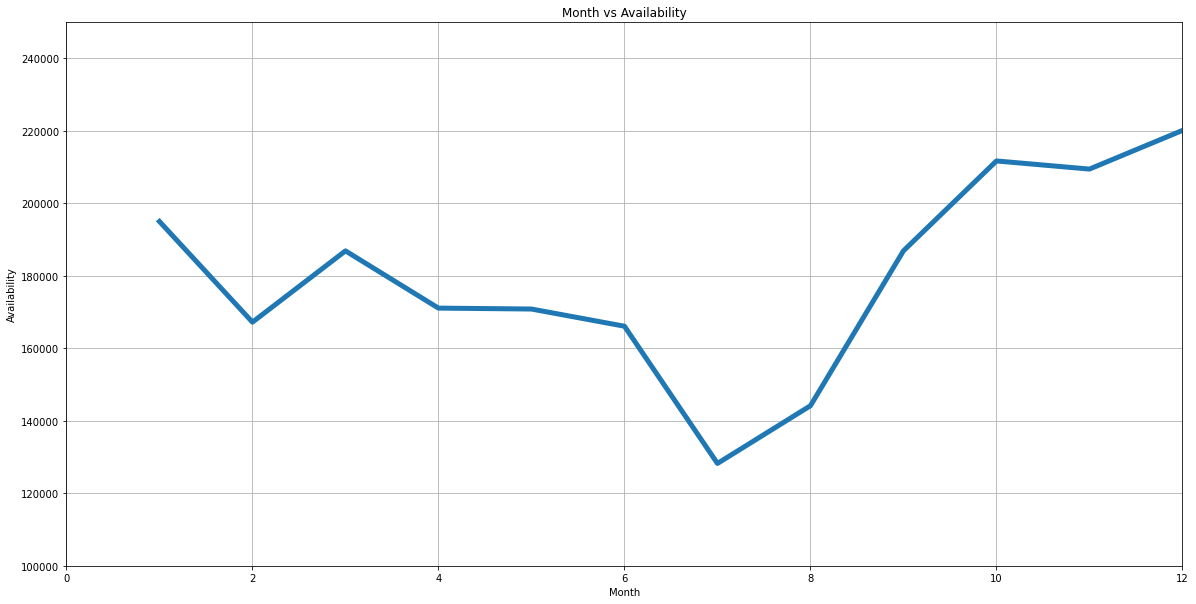

In [13]:
plt.figure(figsize=(20, 10))
x = df_cal_month_sum['month']
y = df_cal_month_sum['available']
plt.plot(x,y,linewidth=5.0)
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Month vs Availability')
plt.axis([0, 12, 100000, 250000])
plt.grid(True)
plt.show()

In [14]:
df_cal_month_sum['average price'] = df_cal_month_sum['price']/df_cal_month_sum['available']
df_cal_month_sum

,month,available,price,minimum_nights,maximum_nights,average price
0,1,195018,66197352.0,1401175.0,270351381.0,339.442267
1,2,167232,62046511.0,1263736.0,244178722.0,371.020564
2,3,186902,68586400.0,1393781.0,270360007.0,366.964505
3,4,171104,73289100.0,1350152.0,261736592.0,428.330723
4,5,170854,78451107.0,1390031.0,270536660.0,459.170444
5,6,166107,77735098.0,1344249.0,261755865.0,467.982072
6,7,128243,54338736.0,1486112.0,270248915.0,423.716975
7,8,144169,27861648.0,1420113.0,269706011.0,193.256858
8,9,186914,26642323.0,1347163.0,261266839.0,142.537868
9,10,211713,29926168.0,1374227.0,270311509.0,141.352529


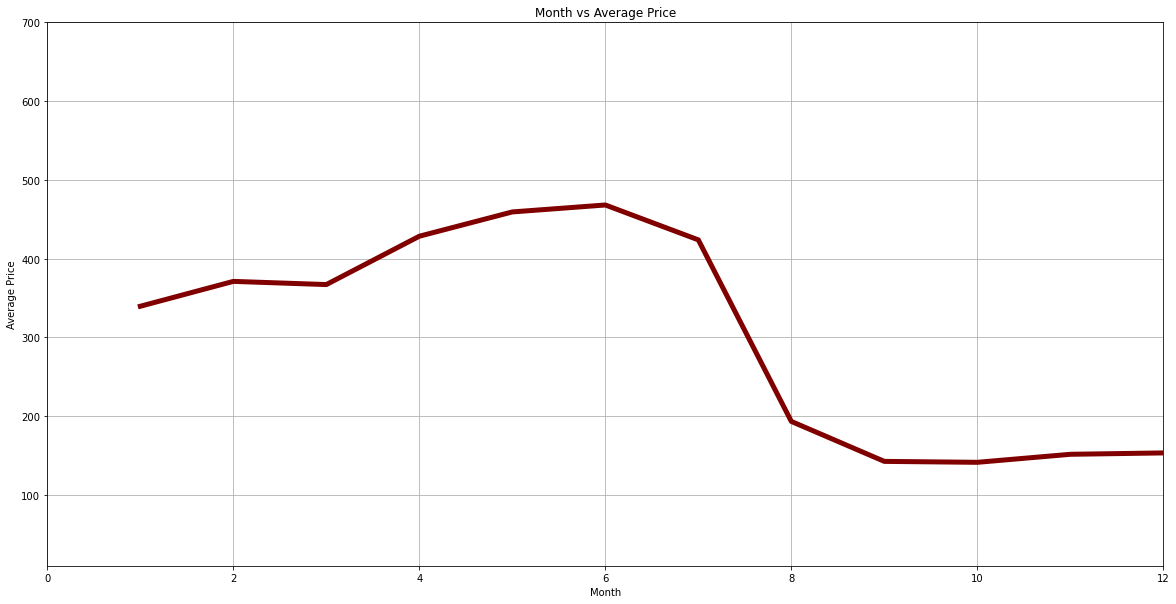

In [15]:
plt.figure(figsize=(20, 10))
x = df_cal_month_sum['month']
y = df_cal_month_sum['average price']
plt.plot(x, y, color ='maroon',
        linewidth=5.0)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Month vs Average Price')
plt.axis([0, 12, 10, 700])
plt.grid(True)
plt.show()


In [16]:
#reviews vs price vs other factors

In [17]:
df_lis['TV'] = 0
df_lis['Wifi'] = 0
df_lis['Kitchen'] = 0
df_lis['Elevator'] = 0
df_lis['Hot water'] = 0
df_lis['Air conditioning'] = 0
df_lis['Refrigerator'] = 0

In [18]:
for i in range(len(df_lis)):
    if 'TV' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'TV'] = 1
    if 'Wifi' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'Wifi'] = 1
    if 'Kitchen' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'Kitchen'] = 1 
    if 'Elevator' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'Elevator'] = 1
    if 'Hot water' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'Hot water'] = 1
    if '"Air conditioning"' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'Air conditioning'] = 1    
    if 'Refrigerator' in df_lis.loc[i,'amenities']:
        df_lis.loc[i,'Refrigerator'] = 1

In [19]:
df_lis['neighbourhood_cleansed']

0                    ΑΜΠΕΛΟΚΗΠΟΙ
1                    ΑΜΠΕΛΟΚΗΠΟΙ
2                    ΑΜΠΕΛΟΚΗΠΟΙ
3                    ΑΜΠΕΛΟΚΗΠΟΙ
4                    ΑΜΠΕΛΟΚΗΠΟΙ
                  ...           
9635                      ΚΥΨΕΛΗ
9636    ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
9637                 ΝΕΟΣ ΚΟΣΜΟΣ
9638    ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ
9639         ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ
Name: neighbourhood_cleansed, Length: 9640, dtype: object

Number of Reviews statistics: 
count    9640.000000
mean       38.037137
std        66.037340
min         0.000000
25%         1.000000
50%         9.000000
75%        46.000000
max       724.000000
Name: number_of_reviews, dtype: float64
Median:  9.0


Text(0, 0.5, 'Number of Airbnbs')

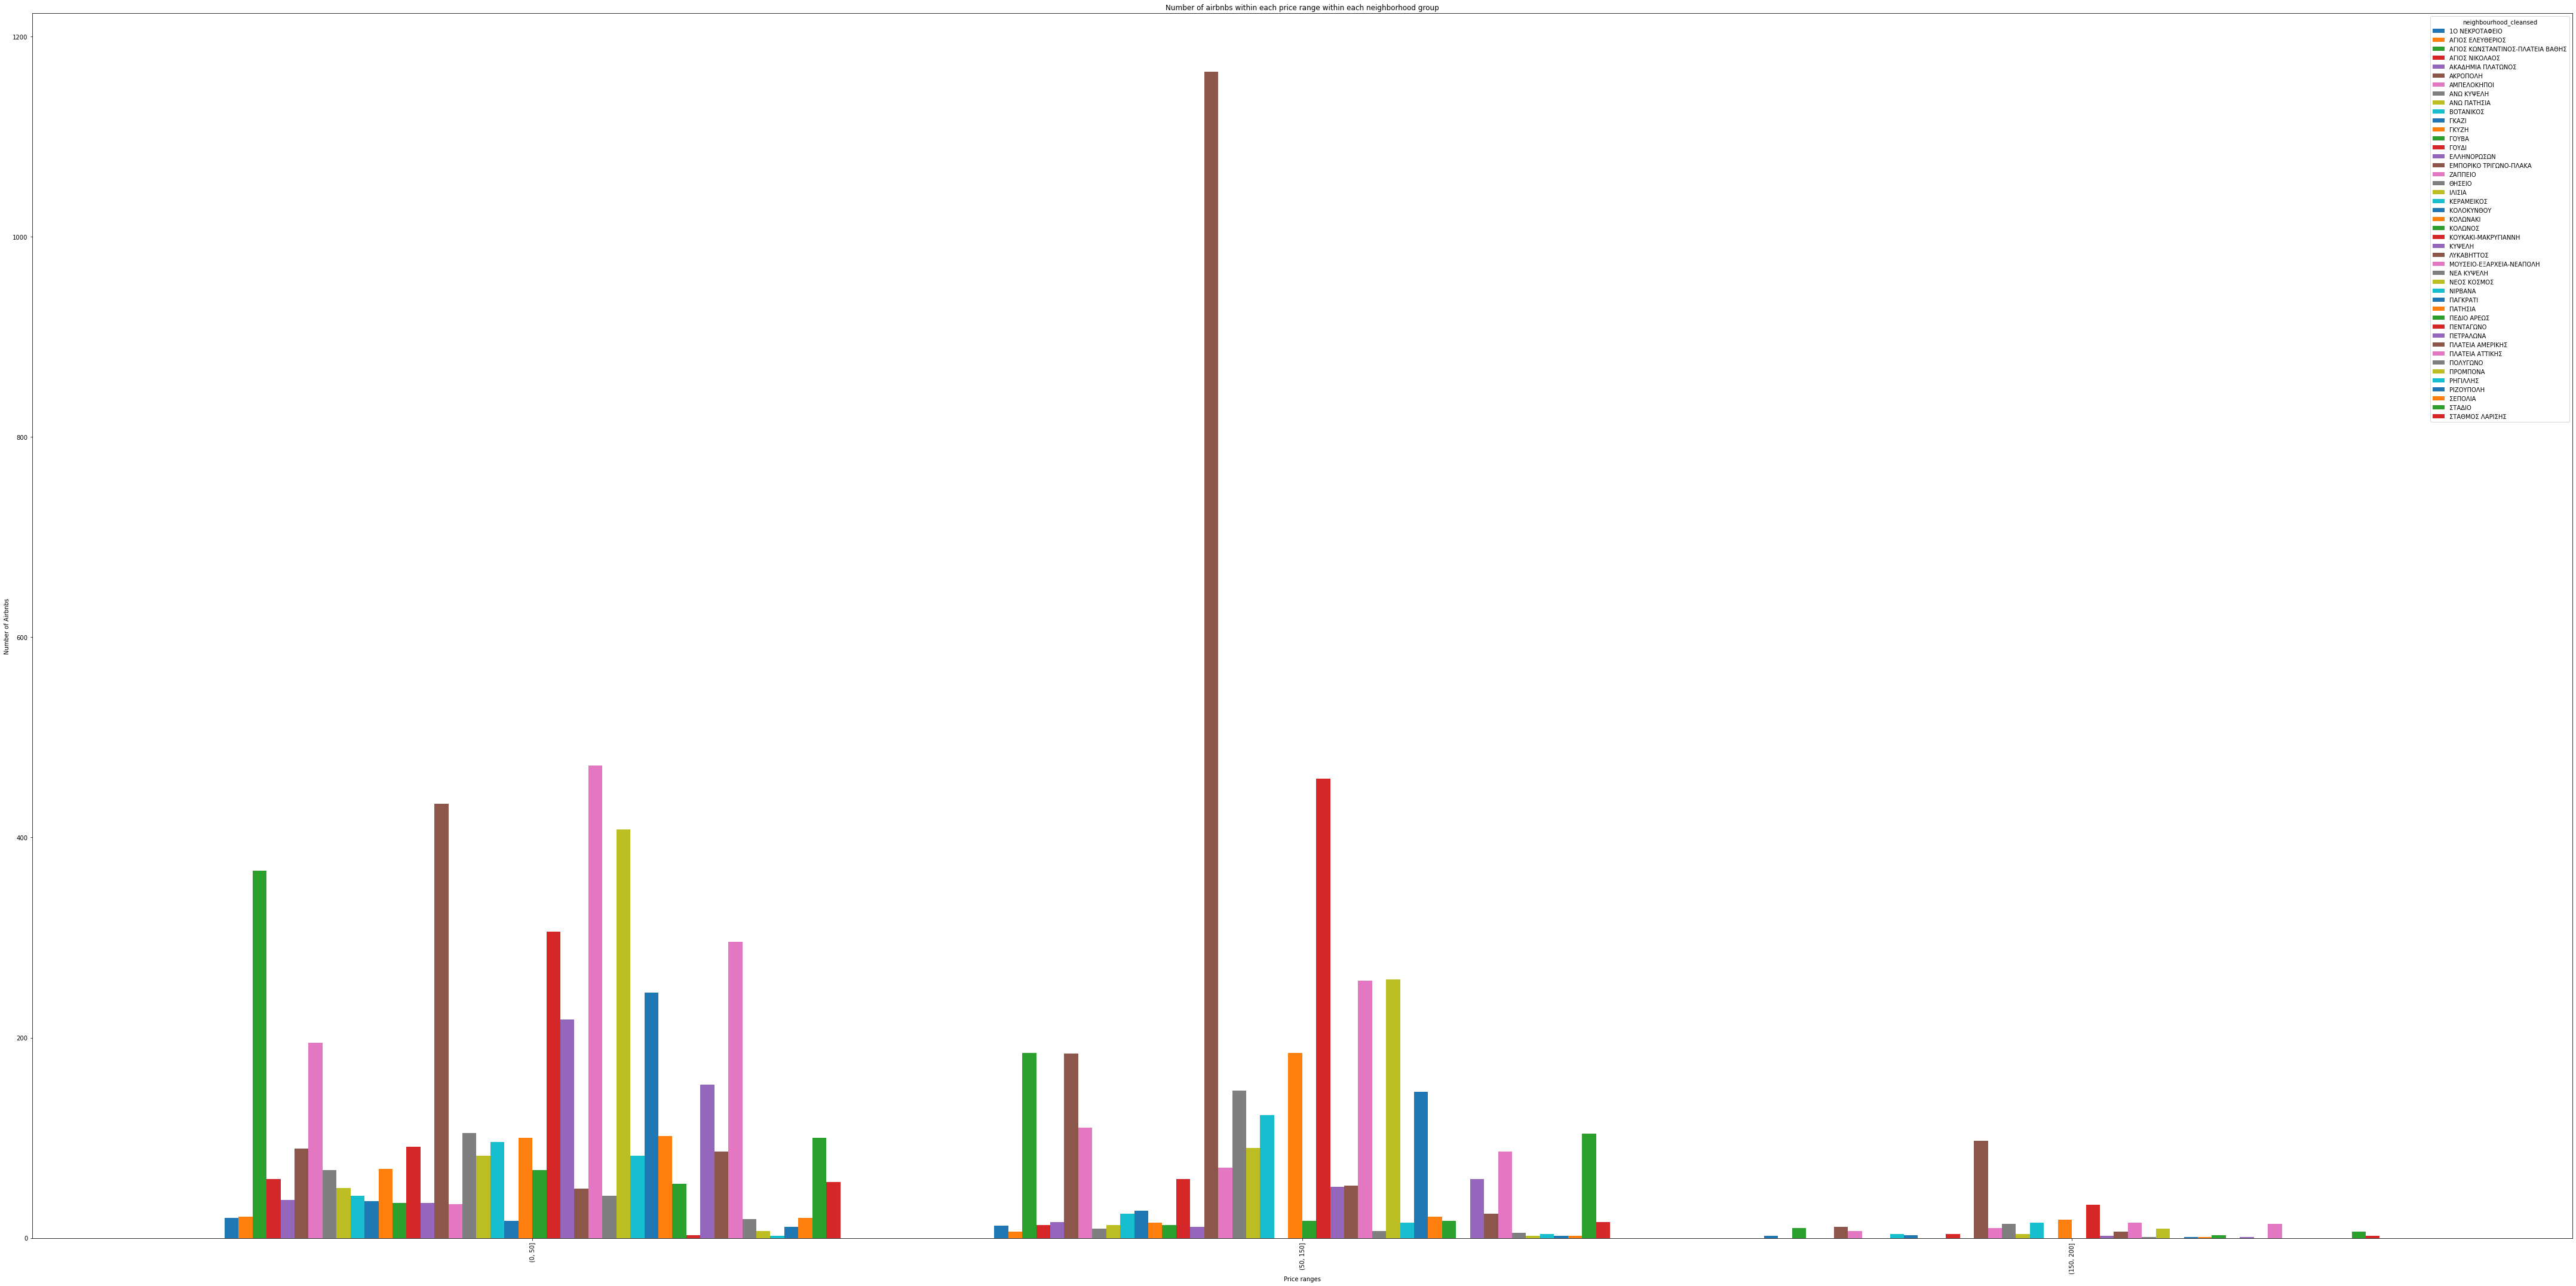

In [20]:
print("Number of Reviews statistics: ")
print(df_lis.number_of_reviews.describe())
print("Median: ", df_lis.number_of_reviews.median())

#Price range distribution for each neighborhood
bins = [0,50,150,200]
groups2 = df_lis.groupby(['neighbourhood_cleansed', pd.cut(df_lis.price, bins)])
groups2 =  groups2.size().unstack()
groups2 = groups2.fillna(0).T
plt.rcParams['figure.figsize']=[60,30]
plt.rcParams['figure.autolayout']=True
groups2.plot.bar( title='Number of airbnbs within each price range within each neighborhood group',width=0.8)
plt.xlabel('Price ranges')
plt.ylabel('Number of Airbnbs')

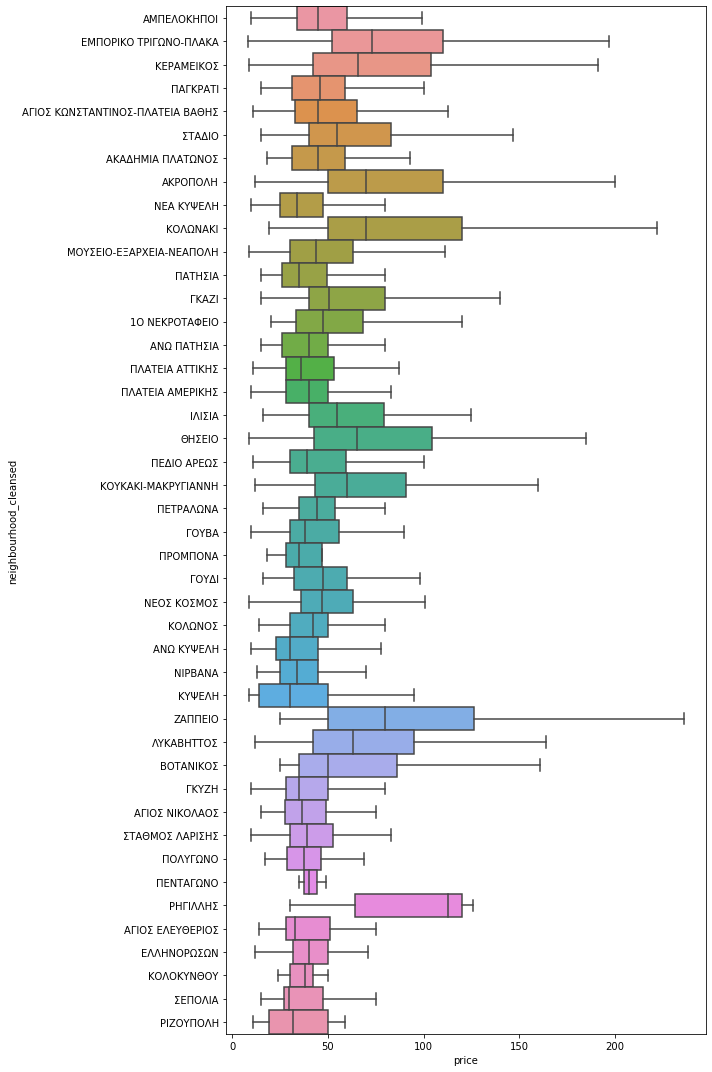

In [21]:
area = plt.gcf()
area.set_size_inches( 10, 15)


sb.boxplot(y = 'neighbourhood_cleansed', x='price', data=df_lis[df_lis.price<10000], orient='h', 
            showfliers = False, width=1);

In [22]:
#Number of reviews for each room type for each neighborpood group

In [23]:
max1 = df_lis['number_of_reviews'].max()
min1 = df_lis['number_of_reviews'].min()

In [24]:
x = ([0, 50, 100,200,300,400,500,600,700])

In [25]:
split1 = pd.cut(df_lis.number_of_reviews, x)

In [26]:
counts1 = df_lis.groupby(['neighbourhood_cleansed', 'room_type'])['number_of_reviews'].mean().to_frame()

In [27]:
counts1 = pd.pivot_table(counts1, index='neighbourhood_cleansed', columns='room_type', values='number_of_reviews')

Text(0, 0.5, 'Average Number of reviews')

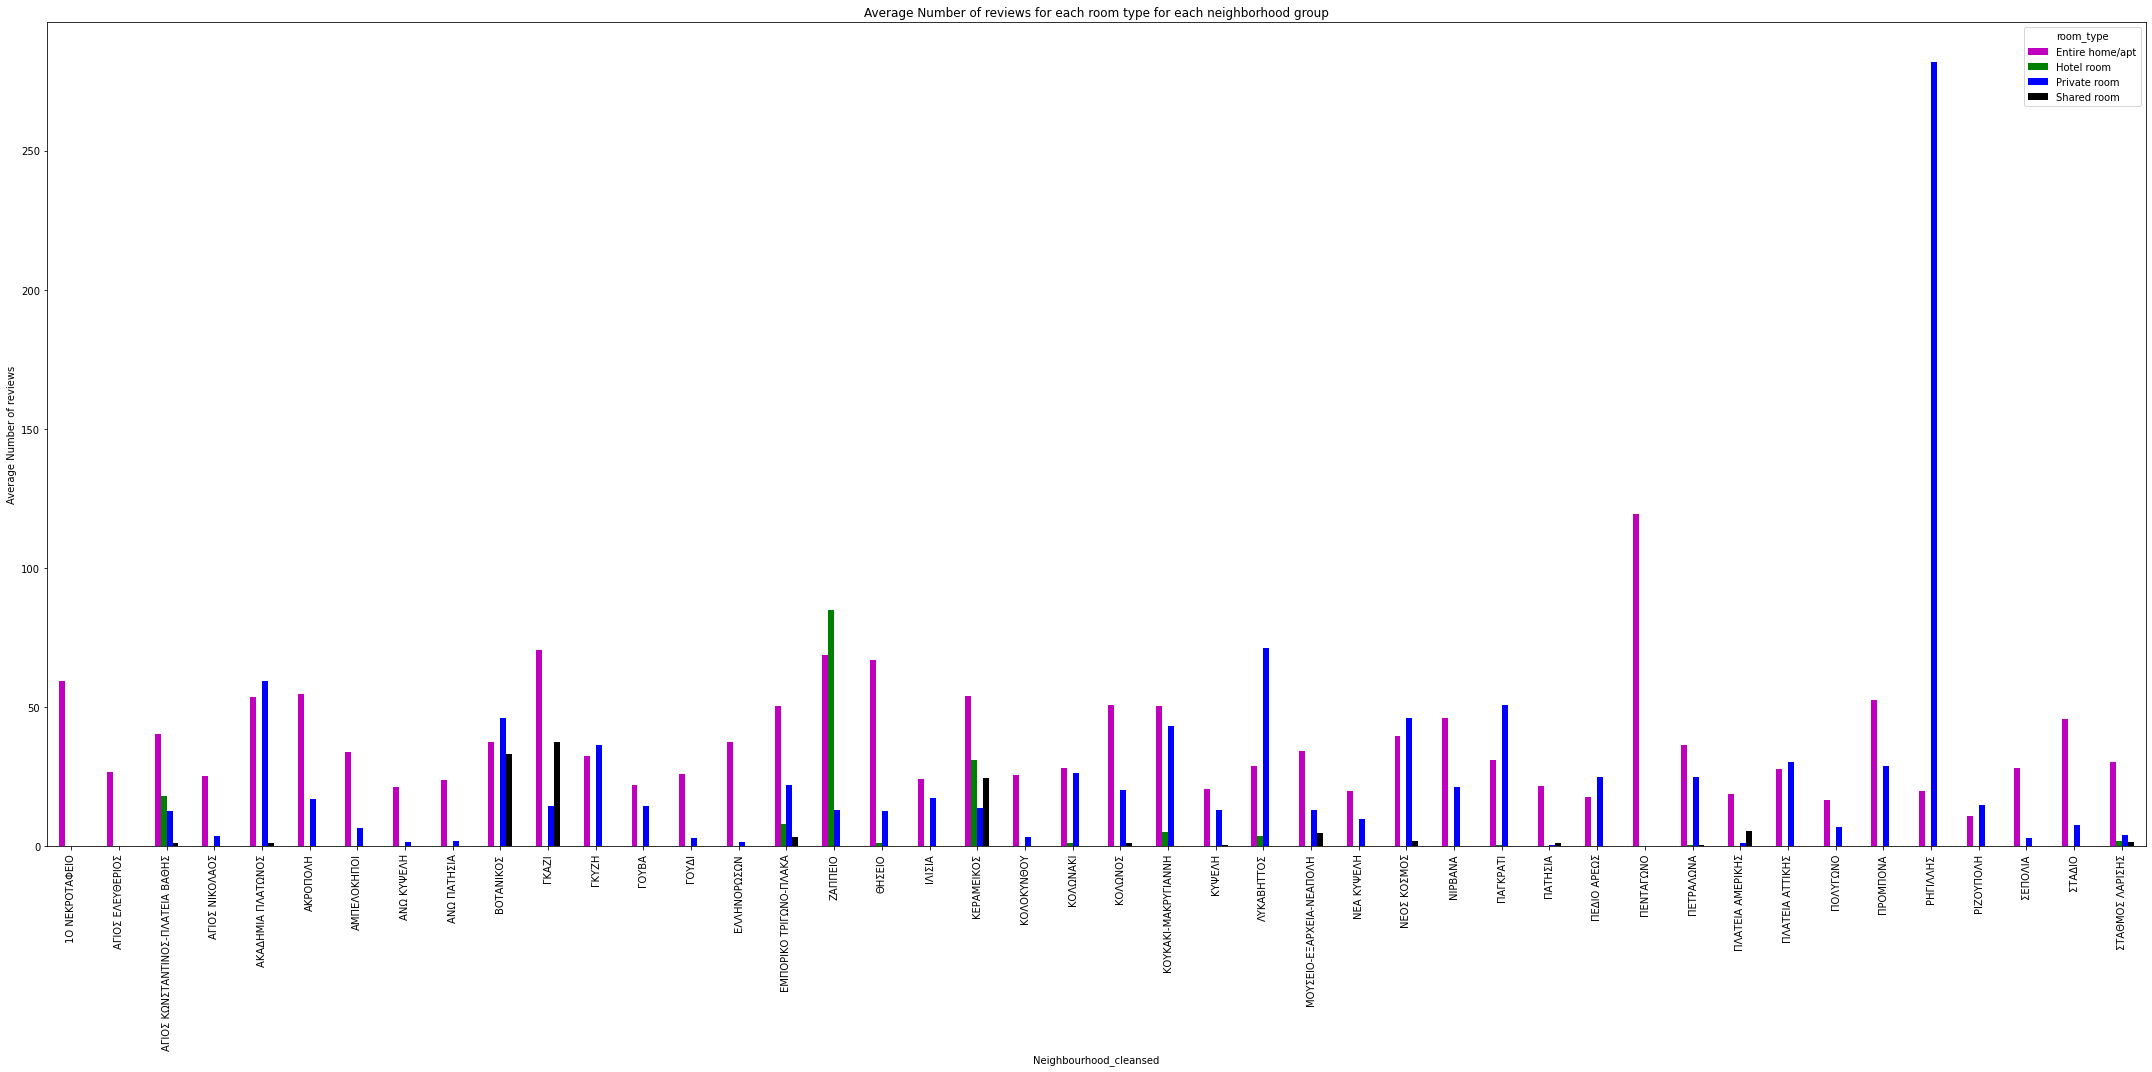

In [28]:
counts1.plot.bar(figsize=(30,15), title='Average Number of reviews for each room type for each neighborhood group', color=['m', 'g', 'b', 'k'])
plt.xlabel('Neighbourhood_cleansed')
plt.ylabel('Average Number of reviews')

In [29]:
#Top 100 airbnbs and their average price, availability and popular room type and neighborhood group

In [30]:
print("\nTop 100 airbnb listings and their characteristics: ")
largest = df_lis.nlargest(100, 'number_of_reviews')['price']
largest2 = df_lis.nlargest(100, 'number_of_reviews')['availability_365']
largest3 = df_lis.nlargest(100, 'number_of_reviews')['room_type']
largest4 = df_lis.nlargest(100, 'number_of_reviews')['neighbourhood_cleansed']
print('Average price: ', largest.mean())
print('Average Availability: ', largest2.mean())
x = largest3.value_counts()
x2 = x.idxmax()
print('Room type: ', x.loc[[x2]])
x3 = largest4.value_counts()
x4 = x3.idxmax()
print('Neighborhood: ', x3.loc[[x4]])


Top 100 airbnb listings and their characteristics: 
Average price:  52.28
Average Availability:  236.81
Room type:  Entire home/apt    93
Name: room_type, dtype: int64
Neighborhood:  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ    37
Name: neighbourhood_cleansed, dtype: int64


In [31]:
arr=df_lis.loc[df_lis['room_type'] == "Entire home/apt", 'price'].reset_index()
arr2=df_lis.loc[df_lis['room_type'] == "Private room", 'price'].reset_index()
arr3=df_lis.loc[df_lis['room_type'] == "Shared room", 'price'].reset_index()

In [32]:
homeavg=(np.mean(arr['price']))
privavg=(np.mean(arr2['price']))
shareavg=(np.mean(arr3['price']))

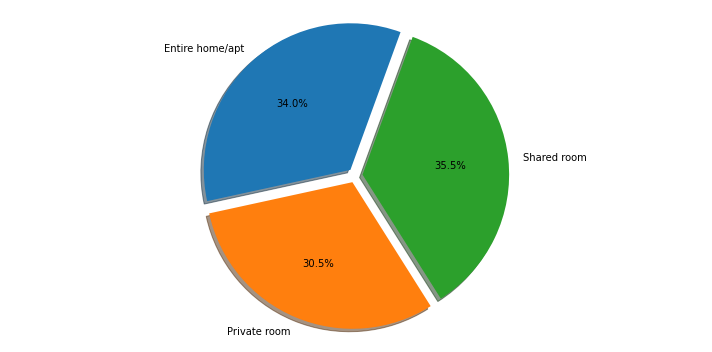

In [72]:
averages= []
house='Entire home/apt', 'Private room', 'Shared room'
averages.append(homeavg)
averages.append(privavg)
averages.append(shareavg)
sizes = averages
explode = (0.05, 0.05, 0.05)
plt.rcParams['figure.figsize']=[10,5]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=house, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.show()

In [35]:
df_lis.groupby('neighbourhood_cleansed')['price'].mean()

neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                       63.205882
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    416.034483
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    167.546218
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                       40.291667
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                    52.636364
ΑΚΡΟΠΟΛΗ                             98.543689
ΑΜΠΕΛΟΚΗΠΟΙ                          82.586751
ΑΝΩ ΚΥΨΕΛΗ                           41.367089
ΑΝΩ ΠΑΤΗΣΙΑ                          43.428571
ΒΟΤΑΝΙΚΟΣ                           149.440000
ΓΚΑΖΙ                                90.797297
ΓΚΥΖΗ                                44.941176
ΓΟΥΒΑ                                57.860000
ΓΟΥΔΙ                                53.376623
ΕΛΛΗΝΟΡΩΣΩΝ                          44.130435
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              106.401111
ΖΑΠΠΕΙΟ                             173.833333
ΘΗΣΕΙΟ                               87.770318
ΙΛΙΣΙΑ                               71.833333
ΚΕΡΑΜΕΙΚΟΣ                          102.535433
ΚΟΛΟΚΥΝΘΟΥ                           

In [36]:
import copy
listings_df_amenities = copy.deepcopy(df_lis)
listings_df_amenities.sample(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Wifi,Kitchen,Elevator,Hot water,Air conditioning,Refrigerator
2521,22501213,https://www.airbnb.com/rooms/22501213,20210715154418,2021-07-17,Cosy studio appartment next to Megaron Mousikis,Σε απόσταση 6 λεπτών από τη στάση μέτρο «Μέγαρ...,The neighborhood is very quiet and safe and ha...,https://a0.muscache.com/pictures/e586142e-2a3d...,165080423,https://www.airbnb.com/users/show/165080423,...,0,0,7.07,1,1,1,0,1,1,1
5910,35392915,https://www.airbnb.com/rooms/35392915,20210715154418,2021-07-15,Athens Syntagma Artistic 2 Studio,Athens Syntagma Artistic 2 studio is located i...,Heart of Athens!!!<br />Breath away from Acrop...,https://a0.muscache.com/pictures/377826bf-3ec7...,266439697,https://www.airbnb.com/users/show/266439697,...,0,0,9.69,1,1,1,1,1,1,1


In [37]:
df_lis['price'].fillna('0', inplace=True)

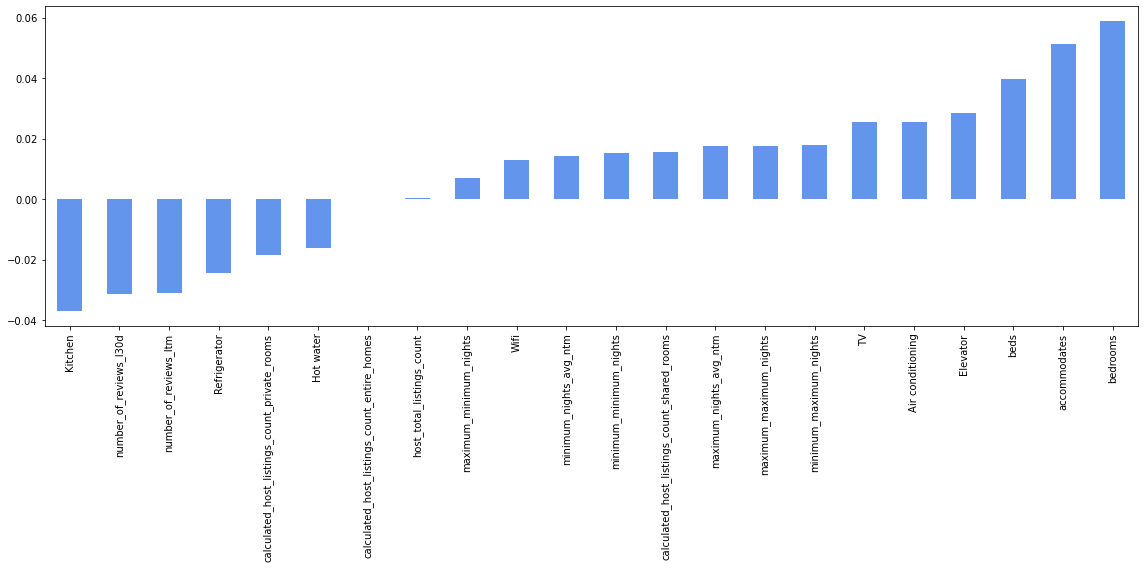

In [38]:
plt.figure(figsize=(16,8))
listings_df_amenities.drop(['id','reviews_per_month','host_id','longitude','latitude',\
                  'reviews_per_month','number_of_reviews','availability_90',\
                  'calculated_host_listings_count','availability_60',\
                  'availability_30','review_scores_value','review_scores_communication',\
                  'review_scores_checkin','review_scores_accuracy','review_scores_rating',\
                  'review_scores_cleanliness','availability_365','review_scores_location',\
                  'maximum_nights','minimum_nights','host_listings_count'],axis=1,inplace=True)
listings_df_amenities.corr()['price'].dropna().sort_values()[:-1].plot(kind='bar', color='cornflowerblue')

plt.show()

In [39]:
listings_df_neigh = df_lis.groupby(['neighbourhood_cleansed']).mean()
listings_df_neigh.reset_index(inplace=True)
listings_df_neigh.sort_values(['price'],inplace=True,ascending=False)

In [40]:
listings_df_neigh.sample(2)

,neighbourhood_cleansed,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Wifi,Kitchen,Elevator,Hot water,Air conditioning,Refrigerator
14,ΕΛΛΗΝΟΡΩΣΩΝ,2.928421e+07,2.021072e+13,1.389149e+08,11.043478,11.043478,NaN,37.996533,23.773263,3.326087,...,0.76087,0.0,1.35,0.934783,0.978261,0.934783,0.413043,0.717391,0.891304,0.673913
33,ΠΕΝΤΑΓΩΝΟ,2.320545e+07,2.021072e+13,9.416688e+07,10.666667,10.666667,NaN,37.998939,23.781802,3.000000,...,0.00000,0.0,2.00,1.000000,1.000000,1.000000,0.333333,1.000000,0.666667,1.000000


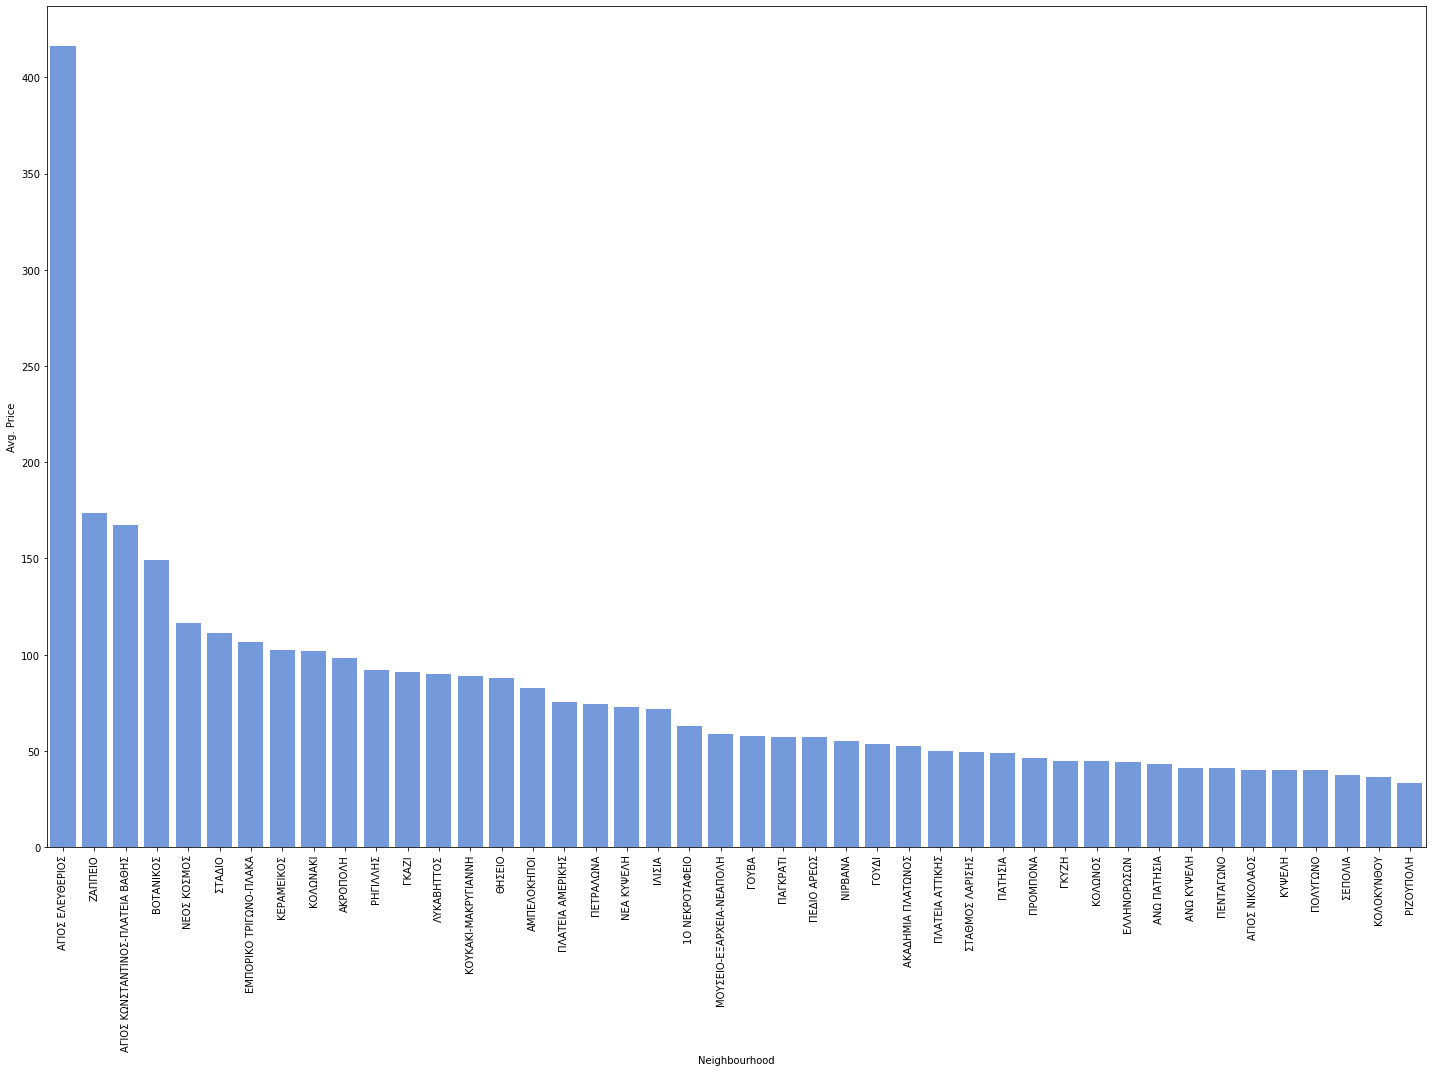

In [60]:
plt.figure(figsize=(20,15))
sb.barplot(x='neighbourhood_cleansed',y='price',data=listings_df_neigh,color='cornflowerblue')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Avg. Price')
plt.show()

In [42]:
df_lis['neigh_avg_price'] = df_lis['neighbourhood_cleansed'].apply(lambda x: float(listings_df_neigh[listings_df_neigh['neighbourhood_cleansed']== x]['price'].values))

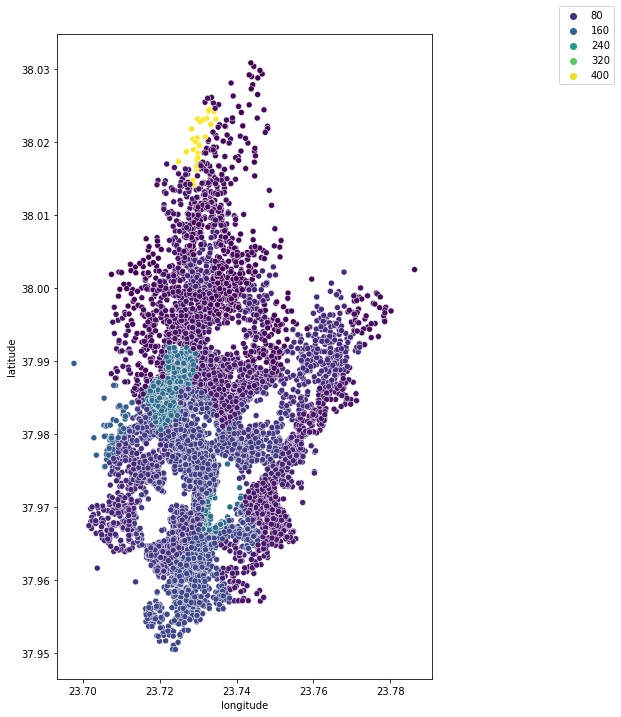

In [43]:
plt.figure(figsize=(10,10))
sb.scatterplot(x='longitude',y='latitude',data=df_lis,hue='neigh_avg_price',palette='viridis')
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1.05))
plt.show()

In [44]:
df_lis['host_acceptance_rate'] = df_lis['host_acceptance_rate'].str.replace("%", "").astype("float")

In [45]:
df_lis['host_response_rate'] = df_lis['host_response_rate'].str.replace("%", "").astype("float")

In [46]:
df_lis['superhost']=np.where(df_lis['host_is_superhost']=='t',1,0)
del df_lis['host_is_superhost']

In [47]:
non_num_vars = df_lis.select_dtypes(include=['object']).columns
df_lis[non_num_vars].head()

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,https://www.airbnb.com/rooms/10595,2021-07-17,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",...,Entire apartment,Entire home/apt,2 baths,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",t,2021-07-17,2015-05-25,2019-04-04,00000957568,t
1,https://www.airbnb.com/rooms/10990,2021-07-17,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",...,Entire apartment,Entire home/apt,1 bath,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",t,2021-07-17,2015-11-25,2016-02-22,00001070920,t
2,https://www.airbnb.com/rooms/10993,2021-07-17,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",...,Entire apartment,Entire home/apt,1 bath,"[""Shampoo"", ""Kitchen"", ""Long term stays allowe...",t,2021-07-17,2015-10-18,2018-03-31,00000957080,t
3,https://www.airbnb.com/rooms/10995,2021-07-17,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",...,Entire apartment,Entire home/apt,1 bath,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",t,2021-07-17,2015-12-05,2016-08-06,00000957422,t
4,https://www.airbnb.com/rooms/27262,2021-07-17,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",...,Entire apartment,Entire home/apt,1 bath,"[""Shampoo"", ""Kitchen"", ""Air conditioning"", ""Lo...",t,2021-07-17,2015-11-12,2017-05-15,00000957579,t


In [48]:
dummy_vars = pd.get_dummies(df_lis[non_num_vars])
dummy_vars.head()

,listing_url_https://www.airbnb.com/rooms/10008553,listing_url_https://www.airbnb.com/rooms/10027906,listing_url_https://www.airbnb.com/rooms/10045138,listing_url_https://www.airbnb.com/rooms/10045648,listing_url_https://www.airbnb.com/rooms/1004858,listing_url_https://www.airbnb.com/rooms/10053500,listing_url_https://www.airbnb.com/rooms/10053765,listing_url_https://www.airbnb.com/rooms/10063597,listing_url_https://www.airbnb.com/rooms/10066465,listing_url_https://www.airbnb.com/rooms/10080423,...,license_Ε.Σ.Λ. 1107344,license_ΕΣΛ 0206K12000346201,license_ΕΣΛ 1024280,license_ΕΣΛ0206Κ12000344901,license_ΖΜ-1989888,license_ΜΗΤΕ 0206Κ015Α0000200,license_ΜΗΤΕ 0206Κ92000310201,license_οοοοο597489,instant_bookable_f,instant_bookable_t
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
Stat3=df_lis.drop(non_num_vars,axis=1)
Stat3 = pd.merge(Stat3,dummy_vars, left_index=True, right_index=True)
Stat3.head()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,...,license_Ε.Σ.Λ. 1107344,license_ΕΣΛ 0206K12000346201,license_ΕΣΛ 1024280,license_ΕΣΛ0206Κ12000344901,license_ΖΜ-1989888,license_ΜΗΤΕ 0206Κ015Α0000200,license_ΜΗΤΕ 0206Κ92000310201,license_οοοοο597489,instant_bookable_f,instant_bookable_t
0,10595,20210715154418,37177,100.0,97.0,6.0,6.0,NaN,37.98863,23.76527,...,0,0,0,0,0,0,0,0,0,1
1,10990,20210715154418,37177,100.0,97.0,6.0,6.0,NaN,37.98903,23.76448,...,0,0,0,0,0,0,0,0,0,1
2,10993,20210715154418,37177,100.0,97.0,6.0,6.0,NaN,37.98888,23.76473,...,0,0,0,0,0,0,0,0,0,1
3,10995,20210715154418,37177,100.0,97.0,6.0,6.0,NaN,37.98903,23.76448,...,0,0,0,0,0,0,0,0,0,1
4,27262,20210715154418,37177,100.0,97.0,6.0,6.0,NaN,37.98924,23.76500,...,0,0,0,0,0,0,0,0,0,1


In [50]:
to_keep = ['latitude', 'longitude', 'property_type',   
           'review_scores_value', 'price']
df_sub = df_lis[to_keep]
df_sub.head()

,latitude,longitude,property_type,review_scores_value,price
0,37.98863,23.76527,Entire apartment,4.69,100.0
1,37.98903,23.76448,Entire apartment,4.81,59.0
2,37.98888,23.76473,Entire apartment,4.83,45.0
3,37.98903,23.76448,Entire apartment,4.77,60.0
4,37.98924,23.76500,Entire apartment,4.63,69.0


In [51]:
df_sub.property_type.nunique()


47

In [52]:
df_sub.property_type.value_counts(normalize=True)

Entire apartment                      0.733817
Entire condominium                    0.068257
Private room in apartment             0.059232
Entire house                          0.027282
Entire loft                           0.017116
Room in hotel                         0.014730
Room in aparthotel                    0.013693
Room in boutique hotel                0.011411
Entire serviced apartment             0.010581
Private room in condominium           0.004772
Private room in bed and breakfast     0.004357
Room in serviced apartment            0.004149
Private room in house                 0.003423
Shared room in hostel                 0.003320
Private room in serviced apartment    0.002593
Entire townhouse                      0.002593
Entire villa                          0.002282
Shared room in apartment              0.002282
Entire guest suite                    0.001763
Shared room in house                  0.001452
Private room in townhouse             0.001245
Private room 

In [53]:
df_sub.property_type.value_counts(normalize=True)[:10].sum().round(2)
top10 = list(df_sub.property_type.value_counts(normalize=True)[:10].index)

In [54]:
top10

['Entire apartment',
 'Entire condominium',
 'Private room in apartment',
 'Entire house',
 'Entire loft',
 'Room in hotel',
 'Room in aparthotel',
 'Room in boutique hotel',
 'Entire serviced apartment',
 'Private room in condominium']

In [55]:
df_sub.property_type = [x if x in top10 else 'other' for x in   
                        df_sub.property_type]

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [56]:
df_sub.property_type.value_counts(normalize=True)

Entire apartment               0.733817
Entire condominium             0.068257
Private room in apartment      0.059232
other                          0.039108
Entire house                   0.027282
Entire loft                    0.017116
Room in hotel                  0.014730
Room in aparthotel             0.013693
Room in boutique hotel         0.011411
Entire serviced apartment      0.010581
Private room in condominium    0.004772
Name: property_type, dtype: float64

In [57]:
df_sub.price[:5]

0    100.0
1     59.0
2     45.0
3     60.0
4     69.0
Name: price, dtype: float64

In [58]:
df=df_sub[['property_type','price']].groupby('property_type')\
  .agg(['mean','count'])\
    .sort_values(by=('price','mean'), ascending=False).round(2)

In [59]:
df

price      
                               mean count
property_type                            
Room in boutique hotel       183.33   110
Room in aparthotel           182.77   132
other                        154.55   377
Entire serviced apartment    126.53   102
Room in hotel                115.57   142
Entire house                 111.71   263
Entire apartment              88.78  7074
Entire loft                   83.76   165
Entire condominium            68.76   658
Private room in apartment     41.04   571
Private room in condominium   21.91    46